In [1]:
%matplotlib inline

## 复杂网络课程
### *用Python做复杂网络分析*

#### NetworkX
NetworkX是python下的复杂网络分析包，内置了常用的复杂网络分析算法，不定期更新。

相关参考资料：
1. [NetworkX Documentation](https://networkx.github.io)
2. NetworkX入门笔记
    - [呆思的复杂网络博客](https://challenge19.github.io/2017/01/29/Complex-Networks/)
    - [关于不同程序包效率比较的博客](https://challenge19.github.io/2016/08/15/Network-Analysis-Package-in-Python/)
    - [科学网闫小勇博客](http://blog.sciencenet.cn/home.php?mod=space&uid=404069&do=blog&classid=141080&view=me&from=space)

In [2]:
## load packages
import networkx as nx
import numpy as np #数值计算包
import scipy as sp #科学计算包
import matplotlib.pyplot as plt #绘图包

### 简单的统计分析--以空手道俱乐部网络为例

空手道俱乐部网络是复杂网络分析中常用的一个例子网络，在分析节点中心性和社团结构等问题时都会被使用。
因此Networkx中也自带了空手道俱乐部网，以如下方式调用：
```python
G = nx.karate_club_graph()
```

也可以从外部文件读入数据

```python
G = nx.read_edgelist('./data/karate.csv',comments='S',delimiter=',',create_using=nx.Graph(),data=(('type', str),))#数据的位置，产生为什么网络（这里是无向网络），数据是如何分列的
```

In [3]:
##读取 空手道俱乐部 网络
G = nx.karate_club_graph()

接下来对该网络进行一些简单的统计分析。


#### 节点和边

网络节点的数量：
```python
N = G.number_of_nodes()  # len(G.nodes())
```

网络边的数量：
```python
N = G.number_of_edges()  # len(G.edges())
```

In [4]:
## 节点和边的数量

N = G.number_of_nodes()
L = G.number_of_edges()

print 'total nodes:',N
print 'total edges:',L

total nodes: 34
total edges: 78


#### 节点的度

节点的度定义为节点的边的数量(在有向网中，可以是入边或者出边)。

```python
G.degree()  #返回所有节点的度
G.degree(1) #返回特定节点的度
```

degree of each node: {0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}
average degree: 4.58823529412


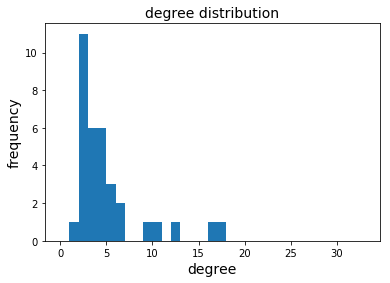

In [9]:
## 节点的度

degs = nx.degree(G)
print 'degree of each node:',degs
print 'average degree:',np.mean(degs.values())
## 度分布 统计分布图

plt.hist(degs.values(), bins=range(N))
plt.xlabel('degree',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.title('degree distribution',fontsize=14)

#### 集聚系数

$$c_i=\frac{\sum_j\sum_m A_{ij}A_{jm}A_{mi}}{k_i(k_i-1)}$$

$$C = \langle c_i \rangle$$

```python
nx.clustering(G)   #返回所有节点的集聚系数
nx.clustering(G,1) #返回特定节点的集聚系数
```

In [11]:
## 聚集系数
cc = nx.clustering(G)
print 'clustering coefficient of each node:',cc
print 'average clustering coefficient:',np.mean(cc.values()) # nx.average_clustering(G)

clustering coefficient of each node: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0.0, 10: 0.6666666666666666, 11: 0.0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
average clustering coefficient: 0.570638478208


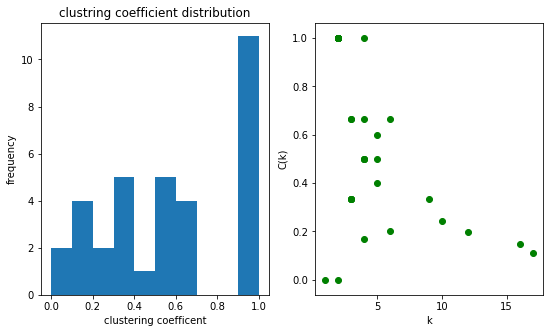

In [12]:
## 聚集系数 统计分布图

plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.hist(cc.values(), bins=10)
plt.xlabel('clustering coefficent')
plt.ylabel('frequency')
plt.title('clustring coefficient distribution')


plt.subplot(1,2,2)
plt.scatter([degs[i] for i in G],[cc[i] for i in G],c='g')
plt.xlabel('k')
plt.ylabel('C(k)')

#### 最短距离

节点间的最短距离$d_{ij}$表示从节点i最少走多少距离可以到节点j。

```python
nx.shortest_path_length(G,source=1,target=2) #返回特定节点间的最短距离
nx.shortest_path_length(G,source=1) #返回特定节点与其它所有节点的最短距离
nx.shortest_path_length(G) #返回所有节点间的最短距离
```

In [14]:
## 两个节点间的最短距离
d12 = nx.shortest_path_length(G, source=2, target=19) # 节点 2 和节点 19间的最短距离
print 'SPL between 2 and 19:',d12


## 节点间最短距离
avg_d = nx.average_shortest_path_length(G) # 平均最短距离
print 'average SPL:',avg_d

SPL between 2 and 19: 2
average SPL: 2.40819964349


2.40819964349


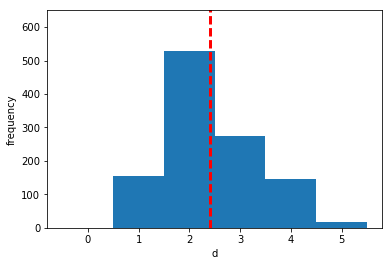

In [15]:
## 最短距离分布
pair_d = nx.shortest_path_length(G) # 任意两个节点间的距离

dd = [pair_d[i][j] for i in G for j in G if i!=j]
print np.mean(dd)

bins = np.arange(-0.5, max(dd)+1.5, 1.0)
plt.hist(dd,bins=bins)

plt.plot([avg_d,avg_d],[0,1000],'r--',lw=3)

plt.ylim(0,650)

plt.xlabel('d')
plt.ylabel('frequency')

NetworkX 在计算最短距离时，如果遇到网络不联通，会提示错误。有两种处理方式：
1. 分别计算分别每个子联通网络的平均最短距离
2. 将不联通的两个节点的距离记为网络规模N

In [16]:
def spl_1(g):
    spl = []
    for sg in nx.connected_component_subgraphs(g):
        spl.append(nx.average_shortest_path_length(sg))
    return np.mean(spl)


def spl_2(g):
    spl = 0
    N = len(g)
    for sg in nx.connected_component_subgraphs(g):
        n = len(sg)
        if len(sg)>1:
            spl+=nx.average_shortest_path_length(sg) * n*(n-1)
        spl += N*n*(N-n)
    return spl/N/(N-1)

In [7]:
print nx.betweenness_centrality(G)


nx.betweenness_centrality()

{0: 0.4376352813852815, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976907, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.304074975949976}


### 随机网络模型
随机网络模型是网络分析中常用的模型网络。
Erd\"os R\'enyi随机网络的产生的规则为以p的概率在任意两个节点产生一条边。
随着网络平均度的增大，ER随机网络会逐渐呈现出丰富的相变现象。

average degree: 6.026
15


(array([ 0.003,  0.016,  0.052,  0.08 ,  0.128,  0.168,  0.143,  0.138,
         0.11 ,  0.08 ,  0.043,  0.021,  0.011,  0.002,  0.004,  0.001]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Patch objects>)

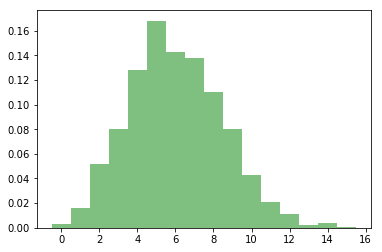

In [36]:
N = 1000
p = 6.0/N

## 产生ER随机网
g = nx.erdos_renyi_graph(N, p, directed=False)

# g = nx.generators.random_graphs.gnm_random_graph(num_of_nodes, num_of_edges)
# g = nx.generators.random_graphs.gnp_random_graph(num_of_nodes, connect_prob)


## 平均度
degree_of_g = nx.degree(g)
print 'average degree:',np.mean(degree_of_g.values())


## 度分布
degree_of_g = degree_of_g.values()
print max(degree_of_g)
bins = np.arange(-0.5, max(degree_of_g)+1.5, 1.0)
plt.hist(degree_of_g, bins = bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('degree')
plt.title('degree distribution')


### 随机网理论分析
1. 理论推导随机网络的度分布(二项分布 -> Poisson)
2. 用程序生成ER随机网，改变不同平均度下，随机网的各个统计指标

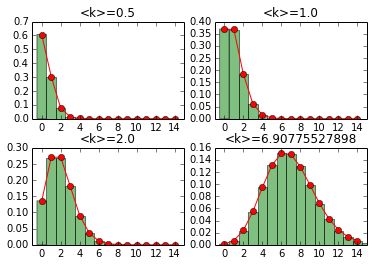

In [26]:
import scipy.stats

N = 1000

krange = [0.5, 1.0, 2.0, np.log(N)]

for i in xrange(4):
    k = krange[i]
    p = 1.0*k/(N-1)
    deg = []
    for _ in xrange(100):
        g = nx.erdos_renyi_graph(N, p, directed=False)
        deg += nx.degree(g).values()
    plt.subplot(2,2,i+1)
    bins = np.arange(-0.5, max(deg)+0.5, 1.0)
    plt.hist(deg, bins = bins, normed=1, facecolor='green', alpha=0.5)
    plt.plot(xrange(15), [scipy.stats.poisson.pmf(xi, k) for xi in xrange(15)], 'ro-')
    plt.xlim(-1, 15)
    plt.title('<k>=%s'%k)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

#### 连通集团
子网络中任意两点间可以可达(有向网络，可以分为弱连通集团和强连通集团)。


```python
nx.connected_component_subgraphs(g) #返回无向网络的各个连通集团
nx.strongly_connected_componen_subgraphs(g) #返回有向网络的强连通集团
nx.waekly_connected_componen_subgraphs(g) #返回有向网络的弱连通集团
```

In [23]:
N = 1000

krange = np.arange(0.2,2*np.log(N), 0.2)

In [24]:
Avg_deg = []
Avg_cls = []
Avg_spl = []
Avg_gcc = []

for k in krange:
    avg_deg = []
    avg_cls = []
    avg_spl = []
    avg_gcc = []
    for _ in xrange(10):
        p = 1.0*k/(N-1)
        g = nx.erdos_renyi_graph(N, p, directed=False)

        avg_deg.append(np.mean(nx.degree(g).values()))
        avg_cls.append(nx.average_clustering(g))
        avg_gcc.append(max([len(x) for x in nx.connected_components(g)]))
        
        avg_spl.append(spl_2(g))
        #if nx.is_connected(g):
            #avg_spl.append(nx.average_shortest_path_length(g))
        #else:
            #avg_spl.append(N-1)
    Avg_deg.append(np.mean(avg_deg))
    Avg_cls.append(np.mean(avg_cls))
    Avg_spl.append(np.mean(avg_spl))
    Avg_gcc.append(1.0*np.mean(avg_gcc)/N)
#plt.plot(krange, Avg_deg, 'o-')
#plt.title('<k>')

最大连通集团随着平均度的变化

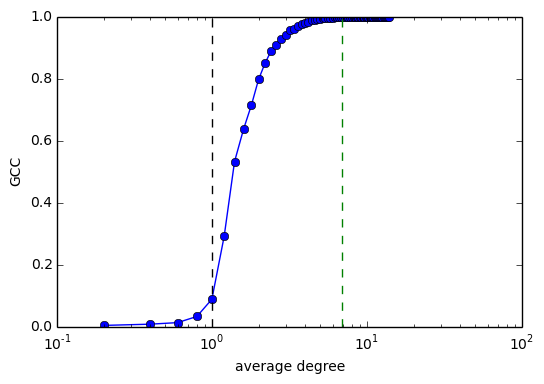

In [5]:
## 最大连通集团
plt.plot(krange, Avg_gcc,'o-')
plt.plot([1,1],[0,1],'k--')
plt.plot([np.log(N)]*2,[0,1],'g--')
plt.xscale('log')
plt.xlabel('average degree')
plt.ylabel('GCC')

集聚系数随着平均度的变化

$$C = \frac{\langle k \rangle}{N}$$

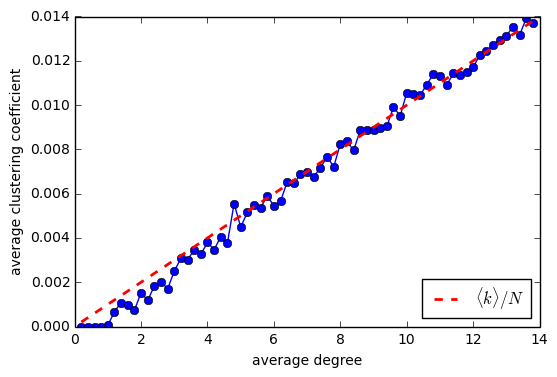

In [6]:
plt.plot(krange, Avg_cls, 'o-')
plt.plot(krange, [k/N for k in krange], 'r--',lw=2,label=r'$\langle k \rangle/N$')
plt.xlabel('average degree')
plt.ylabel('average clustering coefficient')
plt.legend(loc='lower right')

最短距离随着平均度的变化

在平均度比较大的情况下：
$$d = \frac{\ln N}{\ln K}$$

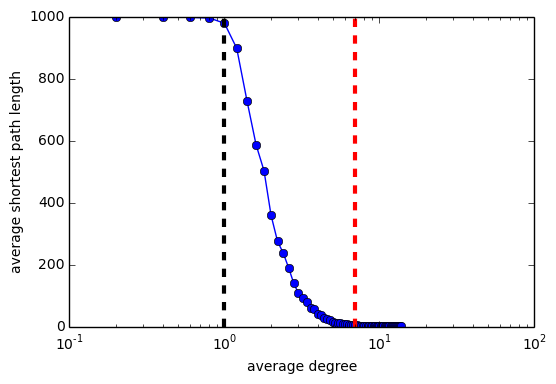

In [28]:
plt.plot(krange, Avg_spl, 'o-')
plt.xscale('log')
plt.xlabel('average degree')
plt.ylabel('average shortest path length')
plt.plot([np.log(N)]*2, [0,1000], 'r--', lw=3)
plt.plot([1]*2, [0,1000], 'k--', lw=3)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


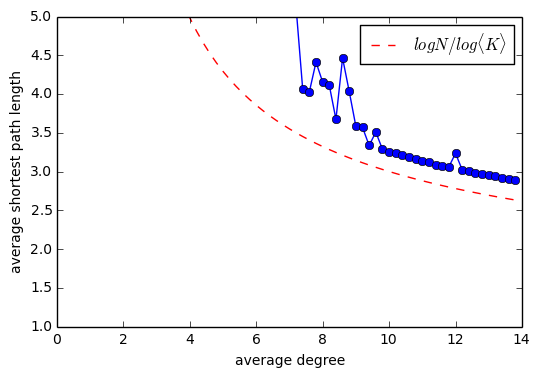

In [26]:
plt.plot(krange, Avg_spl, 'o-')
plt.plot(krange, [np.log(N)/np.log(k) for k in krange], 'r--', label=r'$logN/log\langle K\rangle$')
plt.xlabel('average degree')
plt.ylabel('average shortest path length')
plt.ylim(1,5)
plt.legend()

### 小世界网络相关统计
1. 阅读Nature的WS模型的文献
2. 用程序生成WS模型，并对其小世界特性进行计算

In [ ]:
N = 100 # 节点数
m = 4 # 起始连接的最近邻数
p = 0.1 # 断边重连概率

g = nx.watts_strogatz_graph(N, m, p)

#### 小世界特性

In [3]:
N = 1000
m = 4

g = nx.watts_strogatz_graph(N,m,0)
d0 = nx.average_shortest_path_length(g)
c0 = nx.average_clustering(g)

print d0
print c0

125.375375375
0.5


In [4]:
p = 1.0

prange = []
drange = []
crange = []
for i in xrange(20):
    prange.append(p)
    d = []
    c = []
    for _ in xrange(10):
        g = nx.watts_strogatz_graph(N,m,p)
        d.append(nx.average_shortest_path_length(g))
        c.append(nx.average_clustering(g))
    d = np.mean(d)
    c = np.mean(c)
    drange.append(d/d0)
    crange.append(c/c0)
    p *= 0.6

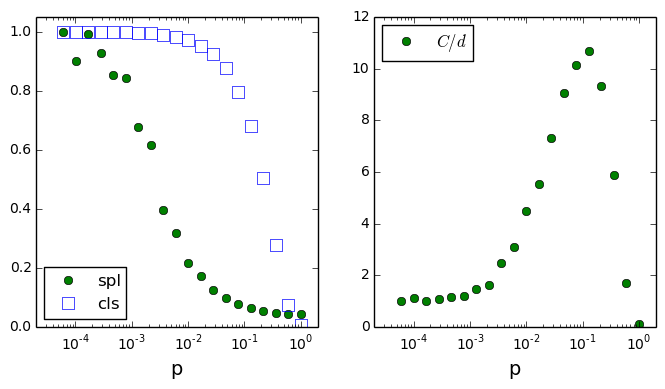

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(prange, drange, 'go', label='spl')
plt.plot(prange, crange, 'bs', ms=8,markeredgecolor='b',markerfacecolor='none',label='cls')
plt.xlim(2e-5,2)
plt.ylim(0,1.05)
plt.xscale('log')
plt.legend(loc='lower left',numpoints=1)
plt.xlabel('p', fontsize=14)

plt.subplot(1,2,2)
ratio = [crange[i]/drange[i] for i in xrange(len(crange))]
plt.plot(prange, ratio, 'go',label=r'$C/d$')
plt.xlim(2e-5,2)
#plt.ylim(0,1.05)
plt.xscale('log')
plt.legend(loc='upper left',numpoints=1)
plt.xlabel('p', fontsize=14)

#### 空手道俱乐部的小世界特性分析

In [4]:
## import network
G = nx.karate_club_graph()

## basic stats
N = G.number_of_nodes()
L = G.number_of_edges()

avg_dist = nx.average_shortest_path_length(G)
avg_clus = nx.average_clustering(G)

print 'avgerage SPL:',avg_dist
print 'avgerage C:',avg_clus

avgerage SPL: 2.40819964349
avgerage C: 0.570638478208



与其随机换边后结果的比较(随机网络是相同节点和边数量的随机网):

In [17]:
## stats of the random shuffled networks
avg_dist_r = []
avg_clus_r = []

#print N,2.0*L/N
for _ in xrange(100):
    g = nx.generators.random_graphs.gnm_random_graph(n=N,m=L,directed=False)
    avg_dist_r.append(spl_2(g))
    avg_clus_r.append(nx.average_clustering(g))
#    if nx.is_connected(g):
#        avg_dist_r.append(nx.average_shortest_path_length(g))
#        avg_clus_r.append(nx.average_clustering(g))
#    else:
#        continue

    
avg_dist_r = np.mean(avg_dist_r)
avg_clus_r = np.mean(avg_clus_r)


print 'avgerage SPL:',avg_dist_r
print 'avgerage C:',avg_clus_r



34 4.58823529412
avgerage SPL: 2.83795008913
avgerage C: 0.128854362957


集聚系数相比于随机化的情况大很多。

| | N| < k \>| L | L_random | C | C_random |
|:--:|:---:|:---:|:--:|:--:|:--:|:--:|
|karate| 34 | 4.5 | 2.4 | 2.84 | 0.57 | 0.13| 

### 网络中的度相关（匹配性）
1. 请选择一个实际网络，用三种方式来看网络的匹配性
2. 对上一张生成的BA网络，看网络的匹配性
3. 阅读Newman相关文献，并思考：Newman所提指标与计算度的pearson相关系数见的关系

In [35]:
## 实际网络
# 科学家合作网
h = nx.read_edgelist('N1461_Coauthorships', create_using=nx.Graph())

# neural network
g = nx.read_edgelist('N297_Celegans_neural', create_using=nx.Graph())
## newman's assortativity coefficient
print nx.assortativity.degree_assortativity_coefficient(g)
print nx.degree_pearson_correlation_coefficient(g)

print nx.assortativity.degree_assortativity_coefficient(h)

-0.163199210316
-0.163199210316
0.461622466753


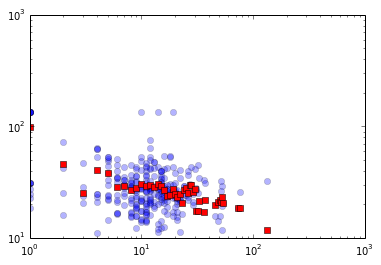

In [36]:
## Degree Correlation Function
annd = nx.average_neighbor_degree(g)
deg = nx.degree(g)

plt.loglog(deg.values(), annd.values(), 'bo', alpha=0.3)


x = {}
for i in deg:
    if deg[i] in x:
        x[deg[i]].append(annd[i])
    else:
        x[deg[i]] = [annd[i]]

x = {i:np.mean(x[i]) for i in x}
plt.loglog(x.keys(), x.values(), 'rs')

(134, 0)

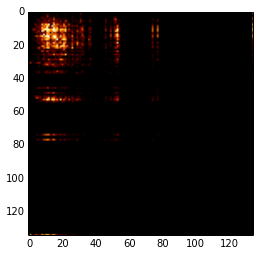

In [37]:
## Degree Correlation Matrix
max_k = max(deg.values())
emat = np.zeros((max_k+1, max_k+1))

for i,j in g.edges():
    ki = deg[i]
    kj = deg[j]
    emat[ki,kj] += 1
    emat[kj,ki] += 1

    
plt.imshow(emat, cmap = 'afmhot')
plt.ylim(max_k, 0)

In [78]:
## BA网络

g = nx.barabasi_albert_graph(100, 2)

## newman's assortativity coefficient
nx.assortativity.degree_assortativity_coefficient(g)

-0.1649524705103842

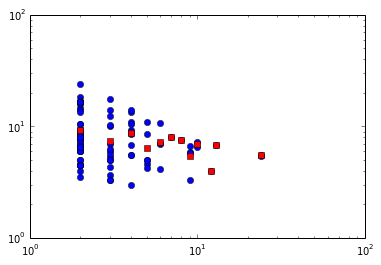

In [85]:
## Degree Correlation Function
annd = nx.average_neighbor_degree(g)
deg = nx.degree(g)

plt.loglog(deg.values(), annd.values(), 'o')


x = {}
for i in xrange(len(deg)):
    if deg[i] in x:
        x[deg[i]].append(annd[i])
    else:
        x[deg[i]] = [annd[i]]

x = {i:np.mean(x[i]) for i in x}
plt.loglog(x.keys(), x.values(), 'rs')

(24, 0)

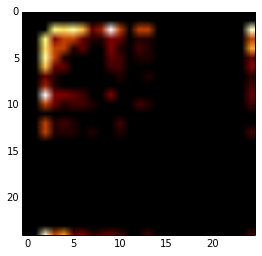

In [86]:
## Degree Correlation Matrix
max_k = max(deg.values())
emat = np.zeros((max_k+1, max_k+1))

for i,j in g.edges():
    ki = deg[i]
    kj = deg[j]
    emat[ki,kj] += 1
    emat[kj,ki] += 1

    
plt.imshow(emat, cmap = 'afmhot')
plt.ylim(max_k, 0)

### 无标度网络
本章练习与作业
1. 拟合一个实际网络的度分布是否是幂律的？
2. 阅读BA模型的文献;用程序生成一个BA模型，并且拟合度分布及幂律指数

In [38]:
## 读取网络链接数据

edgelist = []
authors = []
papers = []
with open('paperauthorId', 'r') as fr:
    for line in fr:
        p,a = line.strip().split('\t')
        edgelist.append(('p'+p, 'a'+a))
        authors.append('a'+a)
        papers.append('p'+p)

B = nx.Graph()
B.add_edges_from(edgelist)


authors = list(set(authors))
print len(authors)
#B = nx.read_edgelist('paperauthorId',create_using=nx.Graph(), nodetype=int)

1992


In [39]:
print B.number_of_nodes(), B.number_of_edges()
print nx.is_bipartite(B)

4004 5240
True


In [42]:
## 将二分网映射为作者合作网

g = nx.algorithms.bipartite.project(B, nodes=authors)

g= nx.connected_component_subgraphs(g)[0]
print g.number_of_nodes(), g.number_of_edges()


888 2265


[0, 92, 150, 169, 153, 79, 62, 34, 37, 21, 16, 10, 8, 5, 6, 13, 1, 4, 2, 2, 1, 2, 2, 4, 3, 2, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


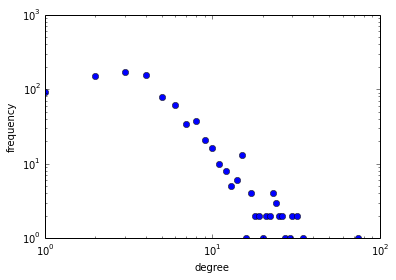

In [43]:
## degree of each nodes
deg_dist = nx.degree_histogram(g)
print deg_dist

plt.loglog(range(0, len(deg_dist)), deg_dist, 'o')
plt.xlabel('degree')
plt.ylabel('frequency')


-2.84867804466 9.21739992468


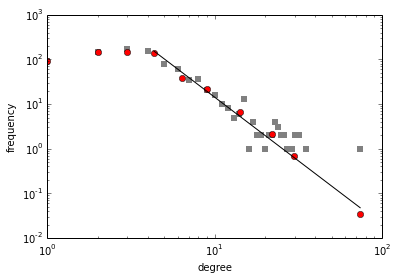

In [47]:
## 非等间距分箱

x = []
y = []

max_k = len(deg_dist)

k0 = 1
dk = 1.5
while k0<=len(deg_dist):
    k1 = k0*dk
    n=sum([deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    m = sum([k*deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    if n>0:
        x.append(1.0*m/n)
        y.append(n/max(1,(k1-k0)))
    k0 = k1

plt.loglog(x,y,'ro')

ln_x = np.log(x[3:])
ln_y = np.log(y[3:])
A = np.vstack([ln_x, np.ones(len(ln_x))]).T
m,c = np.linalg.lstsq(A,ln_y)[0]
print m,c
plt.plot(np.e**ln_x,np.e**(m*ln_x+c), 'k-')

plt.loglog(range(0, len(deg_dist)), deg_dist, 's', markerfacecolor='gray', markeredgecolor='none', zorder=-10)
plt.xlabel('degree')
plt.ylabel('frequency')

-1.91226731658 8.99300150482


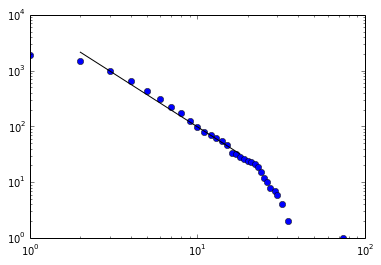

In [48]:
##累积分布
degree = nx.degree(g)
degree = degree.values()
distKeys = set(degree)
pdf = dict([(k,0) for k in distKeys])
for k in degree:
    pdf[k] += 1

cdf = dict([(k,0) for k in set(degree)])
for k in set(degree):
    cdf[k] = sum(np.array(degree)>=k)
    
plt.loglog(cdf.keys(), cdf.values(), 'o')
x = np.array([k for k in xrange(2,19)])
y = np.array([cdf[k] for k in xrange(2,19)])

x = np.log(x)
y = np.log(y)
A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y)[0]
print m,c
plt.plot(np.e**x,np.e**(m*x+c), 'k-')

BA网络幂律指数拟合

-2.8084035939 13.1406563837


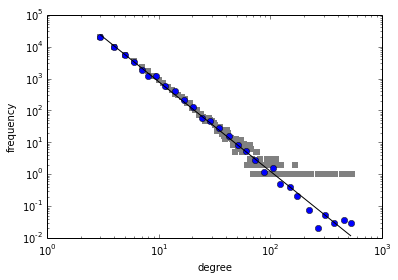

In [56]:
g = nx.barabasi_albert_graph(50000, 3)

deg_dist = nx.degree_histogram(g)
degree = nx.degree(g)
del g



-2.83381737218 13.2104809897


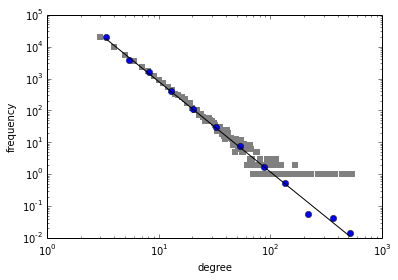

In [61]:
## 非等间距分箱

x = []
y = []

max_k = len(deg_dist)

k0 = 1
dk = 1.6
while k0<=len(deg_dist):
    k1 = k0*dk
    n=sum([deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    m = sum([k*deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    if n>0:
        x.append(1.0*m/n)
        y.append(n/max(1,(k1-k0)))
    k0 = k1

plt.loglog(x,y,'o')

ln_x = np.log(x[:])
ln_y = np.log(y[:])
A = np.vstack([ln_x, np.ones(len(ln_x))]).T
m,c = np.linalg.lstsq(A,ln_y)[0]
print m,c
plt.plot(np.e**ln_x,np.e**(m*ln_x+c), 'k-')

plt.loglog(range(0, len(deg_dist)), deg_dist, 's', markerfacecolor='gray', markeredgecolor='none', zorder=-10)
plt.xlabel('degree')
plt.ylabel('frequency')

-1.91494260319 12.9729618102


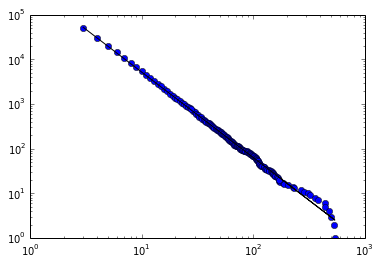

In [58]:
##累积分布
degree = degree.values()
distKeys = set(degree)
pdf = dict([(k,0) for k in distKeys])
for k in degree:
    pdf[k] += 1

cdf = dict([(k,0) for k in set(degree)])
for k in set(degree):
    cdf[k] = sum(np.array(degree)>=k)
    
plt.loglog(cdf.keys(), cdf.values(), 'o')
x = np.array([k for k in cdf])
y = np.array([cdf[k] for k in cdf])

x = np.log(x)
y = np.log(y)
A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y)[0]
print m,c
plt.plot(np.e**x,np.e**(m*x+c), 'k-')

##网络社团划分

In [3]:
## GN benchmark
import random

zin = 13
zout = 3

N = 126
C = 3

n = N/C
nodes = []
nall = []
for a in ['a','b','c']:
    xx = []
    for i in xrange(n):
        xx.append(a+str(i))
    nodes += xx
    nall.append(xx)

pin = 1.0*zin/(n-1)/2
pout = 1.0*zout/(3*n-1)/2

g = nx.Graph()

for nc in nall:
    for i in nc:
        for j in nc:
            if i==j:
                continue
            p = random.random()
            if p<pin:
                g.add_edge(i,j)
        for j in set(nodes)-set(nc):
            p = random.random()
            if p<pout:
                g.add_edge(i,j)

In [4]:
lap_g = nx.laplacian_matrix(g) # laplacian matrix of g

In [5]:
eigval,eigvec = np.linalg.eigh(lap_g)

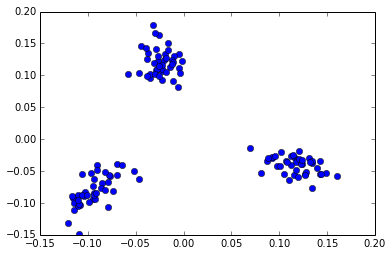

In [6]:
plt.plot(eigvec[:,1],eigvec[:,2],'o')

In [7]:
import community

In [9]:
##first compute the best partition
partition = community.best_partition(g)

In [10]:
partition

{'a0': 2,
 'a1': 2,
 'a10': 2,
 'a11': 2,
 'a12': 2,
 'a13': 2,
 'a14': 2,
 'a15': 2,
 'a16': 2,
 'a17': 2,
 'a18': 2,
 'a19': 2,
 'a2': 2,
 'a20': 2,
 'a21': 2,
 'a22': 2,
 'a23': 2,
 'a24': 2,
 'a25': 2,
 'a26': 2,
 'a27': 2,
 'a28': 2,
 'a29': 2,
 'a3': 2,
 'a30': 2,
 'a31': 2,
 'a32': 2,
 'a33': 2,
 'a34': 2,
 'a35': 2,
 'a36': 2,
 'a37': 2,
 'a38': 2,
 'a39': 2,
 'a4': 2,
 'a40': 2,
 'a41': 2,
 'a5': 2,
 'a6': 2,
 'a7': 2,
 'a8': 2,
 'a9': 2,
 'b0': 0,
 'b1': 0,
 'b10': 0,
 'b11': 0,
 'b12': 0,
 'b13': 0,
 'b14': 0,
 'b15': 0,
 'b16': 0,
 'b17': 0,
 'b18': 0,
 'b19': 0,
 'b2': 0,
 'b20': 0,
 'b21': 0,
 'b22': 0,
 'b23': 0,
 'b24': 0,
 'b25': 0,
 'b26': 0,
 'b27': 0,
 'b28': 0,
 'b29': 0,
 'b3': 0,
 'b30': 0,
 'b31': 0,
 'b32': 0,
 'b33': 0,
 'b34': 0,
 'b35': 0,
 'b36': 0,
 'b37': 0,
 'b38': 0,
 'b39': 0,
 'b4': 0,
 'b40': 0,
 'b41': 0,
 'b5': 0,
 'b6': 0,
 'b7': 0,
 'b8': 0,
 'b9': 0,
 'c0': 1,
 'c1': 1,
 'c10': 1,
 'c11': 1,
 'c12': 1,
 'c13': 1,
 'c14': 1,
 'c15': 1,
 'c16': 1,

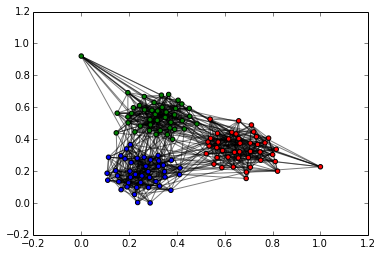

In [13]:
##drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(g)
count = 0.

colors=['r','g','b']
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 20,
                                node_color = colors[com])


nx.draw_networkx_edges(g,pos, alpha=0.5)
plt.show()

In [14]:
## modularity
community.modularity(partition,g)

0.5257097971692732

In [15]:
with open('GN_benchmark.edgelist','w') as f:
    print>>f,'source,target,type,weight'
    for i,j in g.edges():
        print>>f,'%s,%s,undirected,1'%(i,j)

##节点重要性